In [14]:
#import required libraries
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
#function to read prediction data file. Generally expeceted to have format of label,probability score
def read_pred_file(fl_name):
    df = pd.read_csv( fl_name)
    col1 = df.columns[0]
    print("[%d] records loaded from File[%s] " % (df[col1].count(),fl_name))
    
    return df

In [16]:
#set key variables.
ddir = '/disk1/data1/data/models/inception/'
model_name = 'incep_basic_lr01.cpkt'
model_name = 'incep_wofc_lr01.cpkt'
steps = '14999'
pred_df_fl = ddir + model_name + '-' + steps + '_df.csv'


In [17]:
#load data
pred_df = read_pred_file(pred_df_fl)

[37748736] records loaded from File[/disk1/data1/data/models/inception/incep_wofc_lr01.cpkt-14999_df.csv] 


In [18]:
#check data
print("Data columns: ",pred_df.columns)
print(pred_df.head())

Data columns:  Index(['label', 'prob'], dtype='object')
   label      prob
0    0.0  0.018757
1    0.0  0.015408
2    0.0  0.014363
3    0.0  0.014512
4    0.0  0.022295


In [21]:
#calculate ROC specific details and plot the grpah
fpr, tpr, _ = metrics.roc_curve(pred_df.label,  pred_df.prob)
auc = metrics.roc_auc_score(pred_df.label,  pred_df.prob)


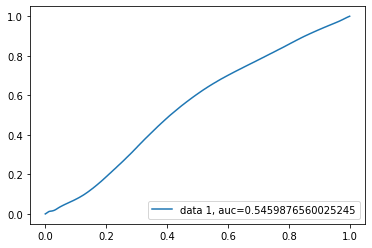

In [22]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [23]:
#Prepare predcition for confusion matrix. create prediction using optimal threshold, in our case threshold is .5
threshold = auc
pred_df['pred'] = pred_df.prob.apply(lambda x: 0. if x < threshold else 1.)

In [24]:
#print confusion matrix.
total = pred_df.label.count()

tot_1s = pred_df[(pred_df.label == 1.)]['label'].count()
tot_0s = pred_df[(pred_df.label == 0.)]['label'].count()
tp = pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 1.)]['label'].count()
tn = pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 0.)]['label'].count()
fp = pred_df[(pred_df.label == 0.) & (pred_df.pred == 1.)]['label'].count()
fn = pred_df[(pred_df.label == 1.) & (pred_df.pred == 0.)]['label'].count()
#print(" tp 1's : ",/tot_1s)
#print(" tp 0's : ",pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 0.)]['label'].count()/tot_0s)

In [25]:
print(" tp: ",tp," fp: ",fp)
print(" fn: ",fn," tn: ",tn)
print(" Total labels 1's: ",tot_1s," Total labels 0's: ",tot_0s)
print(" % labels 1's: ",tot_1s/total," % labels 0's: ",tot_0s/total)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(" Precision: ",precision)
print(" Recall: ",recall)
print(" F1 score: ",2*precision*recall/(precision+recall))


 tp:  2294  fp:  297226
 fn:  280678  tn:  37168538
 Total labels 1's:  282972  Total labels 0's:  37465764
 % labels 1's:  0.007496198018391927  % labels 0's:  0.992503801981608
 Precision:  0.00765892094017094
 Recall:  0.008106809154262613
 F1 score:  0.007876503024934249


In [26]:
print(pred_df.head())
print(pred_df.pred.unique())
print(pred_df.label.unique())

   label      prob  pred
0    0.0  0.018757   0.0
1    0.0  0.015408   0.0
2    0.0  0.014363   0.0
3    0.0  0.014512   0.0
4    0.0  0.022295   0.0
[0. 1.]
[0. 1.]


In [27]:
fp_df = pred_df[(pred_df.label == 0.) & (pred_df.pred == 1.)]
fp_df.prob.describe()

count    297226.000000
mean          0.958580
std           0.071538
min           0.577813
25%           0.961154
50%           0.984607
75%           0.995155
max           0.999997
Name: prob, dtype: float64

In [28]:
fn_df = pred_df[(pred_df.label == 1.) & (pred_df.pred == 0.)]
fn_df.prob.describe()

count    280678.000000
mean          0.017146
std           0.013945
min           0.000011
25%           0.011395
50%           0.015940
75%           0.021156
max           0.518980
Name: prob, dtype: float64

In [29]:
fp_df.prob.describe()

count    297226.000000
mean          0.958580
std           0.071538
min           0.577813
25%           0.961154
50%           0.984607
75%           0.995155
max           0.999997
Name: prob, dtype: float64